In [69]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import tqdm

In [48]:
sigma = 1
gamma_list = np.arange(0.1, 10.1, 0.1)
N_sims = 200
N_data = 2000

In [302]:
def crlb(sigma, N):
    return sigma**2/N

def mse(s_pred, s_true):
    return np.mean(np.square(s_pred-s_true))

def mle_estimate(X):
    return np.mean(X)

def map_estimate(X, sigma, gamma):
    thresh = sigma**2/gamma
    ind_pos = X > thresh
    ind_neg = X < thresh
    
    s = np.zeros(X.shape)
    s[ind_pos] = X[ind_pos] - thresh
    s[ind_neg] = X[ind_neg] + thresh
    return s

def mmse_estimate(X, sigma, gamma):
    const = np.exp(X/gamma + sigma**2/2/(gamma**2))*norm.cdf((-X-sigma**2/gamma)/sigma) +\
            np.exp(-X/gamma + sigma**2/2/(gamma**2))*norm.cdf((X-sigma**2/gamma)/sigma)
    
    expr1 = np.exp(X/gamma + sigma**2/2/(gamma**2))*((sigma/np.sqrt(2*np.pi))*\
            (0-np.exp(-1/2/(sigma**2)*(X+sigma**2/gamma)**2)) + (X + sigma**2/gamma) * norm.cdf((-X-sigma**2/gamma)/sigma))
    expr2 = -np.exp(-X/gamma + sigma**2/2/(gamma**2))*((sigma/np.sqrt(2*np.pi))*\
            (0-np.exp(-1/2/(sigma**2)*(X-sigma**2/gamma)**2)) - (X - sigma**2/gamma) * norm.cdf((X-sigma**2/gamma)/sigma))
    # print(const)
    # print(expr1)
    # print(expr2)
    return (expr1 + expr2)/const





In [303]:
mmse_estimate(x, sigma, gamma)

array([-16.47931003,  -3.33043126,   4.5782412 , ...,  12.91080475,
        -0.08623338,   4.54049849])

In [304]:
mle_estimate(x)

0.21883856769886897

In [305]:
map_estimate(x, sigma, gamma)

array([-1.64793100e+01, -3.33034885e+00,  4.57824075e+00, ...,
        1.29108048e+01,  6.65736185e-03,  4.54049795e+00])

In [306]:
s

array([-14.80309886,  -2.01130609,   5.96278432, ...,  13.50402075,
        -0.64394264,   7.10301212])

In [307]:
crlb = sigma**2/N_data
mse_mle_ret = []
mse_map_ret = []
mse_mmse_ret = []

for gamma in tqdm.tqdm(gamma_list):
    mse_mle = []
    mse_map = []
    mse_mmse = []

    for i in range(N_sims):
        n = np.random.randn(N_data)*sigma
        s = np.random.laplace(scale=gamma, size=N_data)
        x = n + s

        s_mle = mle_estimate(x)
        s_map = map_estimate(x, sigma, gamma)
        s_mmse = mmse_estimate(x, sigma, gamma)

        mse_mle.append(mse(s_mle, s))
        mse_map.append(mse(s_map, s))
        mse_mmse.append(mse(s_mmse, s))
    
    mse_mle_ret.append(np.mean(mse_mle))
    mse_map_ret.append(np.mean(mse_map))
    mse_mmse_ret.append(np.mean(mse_mmse))

100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  5.98it/s]


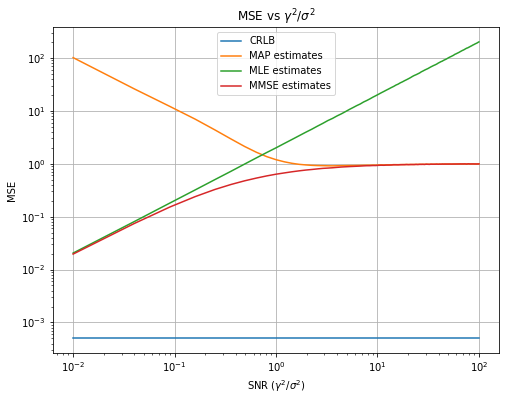

In [308]:
gamma_arr = np.array(gamma_list)**2/(sigma**2)

fig = plt.figure(figsize=(8,6))
plt.plot(gamma_arr, np.repeat(crlb, len(gamma_arr)), label="CRLB")
plt.plot(gamma_arr, mse_map_ret, label="MAP estimates")
plt.plot(gamma_arr, mse_mle_ret, label="MLE estimates")
plt.plot(gamma_arr, mse_mmse_ret, label="MMSE estimates")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("SNR ($\gamma^{2}/\sigma^{2}$)")
plt.ylabel("MSE")
plt.grid(True)
plt.title("MSE vs $\gamma^{2}/\sigma^{2}$")
plt.show()

try using an image, then apply wavelet, then denoise using these estimates, then convert back

In [134]:
mse_mmse_ret

[4.982229199561256e+93, 1.0987942446175979e+38]

In [53]:
mse(s_map, s)

0.9909878246286019

In [63]:
s_mle

0.48612049442904354

In [56]:
s

array([-0.07955775,  7.42270861,  8.1597798 , ...,  8.46293759,
        9.74502016, 26.7596847 ])

In [54]:
s_map

array([ 2.36459175,  8.4983341 ,  9.41444934, ...,  9.0886641 ,
        9.26603935, 26.3110743 ])

In [59]:
np.mean((s_map - s)**2)

0.9909878246286019

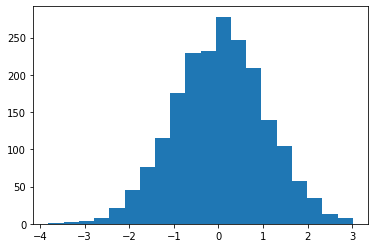

In [10]:
plt.hist(x, bins=20)
plt.show()